In [2]:

import torch
import torch.nn.parallel
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import torch.utils.data
# from model import CNN
import numpy as np
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F

In [24]:
def loss_func(pred, target):
        pred = nn.functional.normalize(pred, dim=1)
        target = nn.functional.normalize(target, dim=1)
        # dot = torch.abs(torch.diag(torch.dot(pred, target)))
        dot = torch.sum(pred * target, dim=1)
        print(dot.shape)
        interm = torch.acos(dot)
        interm = torch.div(interm, np.pi)
        print(interm.shape)
        loss = torch.mean(interm)   
        # loss = 1 - torch.mean(dot)
        # pdb.set_trace()
        return loss, dot, interm

In [3]:
pred = torch.randn(8, 3, 10, 24)
target = torch.randn(8, 3, 10, 24)


In [2]:
#cha=ecking numpy save
import numpy as np
np.save("lullu.npy", np.array([0]))

In [4]:
# with 1- dot loss

loss = loss_func(pred, target)
loss

tensor(0.9840)

In [12]:
torch.acos(torch.tensor(0.1313))

tensor(1.4391)

In [25]:
loss, dot, acos = loss_func(pred, target)
loss

torch.Size([8, 10, 24])
torch.Size([8, 10, 24])


tensor(0.4945)

In [32]:
torch.acos(dot.max())

tensor(0.0289)

In [33]:
torch.acos(dot.min())

tensor(3.0931)

In [56]:
dot.min()

tensor(-0.9988)

In [57]:
dot.max()

tensor(0.9996)

In [37]:
(torch.acos(torch.tensor(1)))/torch.pi

tensor(0.)

In [46]:
(torch.acos(torch.tensor(0)))

tensor(1.5708)

In [47]:
acos.max()

tensor(0.9846)

In [48]:
acos.min()

tensor(0.0092)

In [51]:
x = pred[0,:,0,0]
x

tensor([-1.0025,  0.7688,  0.0227])

In [52]:
y = target[0,:,0,0]
y

tensor([ 0.2006,  0.1750, -0.3637])

In [53]:
torch.dot(x, y)

tensor(-0.0748)

In [55]:
torch.where(dot == -0.0748)

(tensor([], dtype=torch.int64),
 tensor([], dtype=torch.int64),
 tensor([], dtype=torch.int64))

In [4]:
import torch
v1 = torch.rand(8, 3)
v2 = torch.rand(8, 3)
print(v1.shape)

torch.Size([8, 3])


In [5]:
v1.unsqueeze(1).shape

torch.Size([8, 1, 3])

In [8]:
torch.bmm(v1.unsqueeze(1), v2.unsqueeze(2)).view(-1)

tensor([0.5824, 0.9588, 0.6717, 0.5628, 0.1983, 0.5428, 0.7619, 0.9183])

In [9]:
v1.norm(2, 1).shape

torch.Size([8])

In [ ]:
torch.bmm(v1.unsqueeze(1), v2.unsqueeze(2)).view(-1) / torch.clamp(v1.norm(2, 1) * v2.norm(2, 1), min=0.000001)

In [ ]:
def cos_angle(v1, v2):
    v1 = nn.functional.normalize(v1, dim=1)
    v2 = nn.functional.normalize(v2, dim=1)
    return torch.bmm(v1.unsqueeze(1), v2.unsqueeze(2)).view(-1) / torch.clamp(v1.norm(2, 1) * v2.norm(2, 1), min=0.000001)
    
def loss_func(pred, target):
    loss += (1-cos_angle(pred, target)).pow(2).mean() 
    return loss

210
212
212


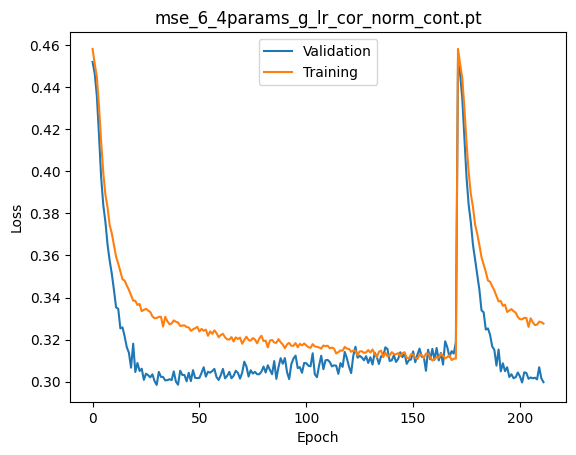

In [24]:

import matplotlib.pyplot as plt
import numpy as np
import torch
checkpoint = torch.load("mse_6_4params_g_lr_cor_norm.pt")
val_losses = checkpoint['val_losses_so_far']
train_losses = checkpoint['train_losses_so_far']
chk2 = torch.load("model_mse_cor_norm.pt")
val_l2 = chk2['val_losses_so_far']
train_l2 = chk2['train_losses_so_far']
val_losses.extend(val_l2)
train_losses.extend(train_l2)
epochs = checkpoint['epoch']
print(epochs)
print(len(val_losses))
print(len(train_losses))

plt.plot(np.arange(212), val_losses)
plt.plot(np.arange(212), train_losses)
plt.legend(["Validation", "Training"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("mse_6_4params_g_lr_cor_norm.pt + the continuation: model_mse_cor_norm.pt")
plt.show()


210
171
171


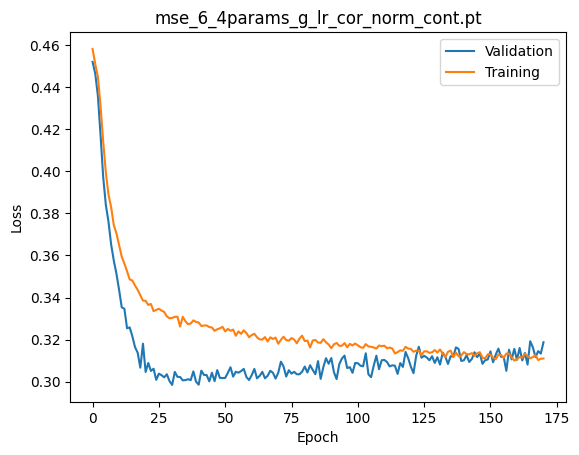

In [27]:

import matplotlib.pyplot as plt
import numpy as np
checkpoint = torch.load("mse_6_4params_g_lr_cor_norm_cont.pt")
val_losses = checkpoint['val_losses_so_far']
train_losses = checkpoint['train_losses_so_far']
epochs = checkpoint['epoch']
print(epochs)
print(len(val_losses))
print(len(train_losses))
plt.plot(np.arange(171), val_losses)
plt.plot(np.arange(171), train_losses)
plt.legend(["Validation", "Training"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("mse_6_4params_g_lr_cor_norm_cont.pt")
plt.show()


280


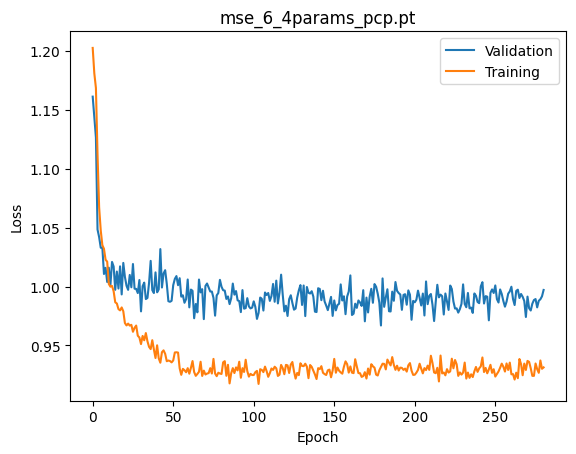

In [242]:

import matplotlib.pyplot as plt
import numpy as np
checkpoint = torch.load("mse_6_4params_pcp.pt")
val_losses = checkpoint['val_losses_so_far']
train_losses = checkpoint['train_losses_so_far']
epochs = checkpoint['epoch']
print(epochs)

plt.plot(np.arange(epochs+ 1), val_losses)
plt.plot(np.arange(epochs+ 1), train_losses)
plt.legend(["Validation", "Training"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("mse_6_4params_pcp.pt")
plt.show()


1060


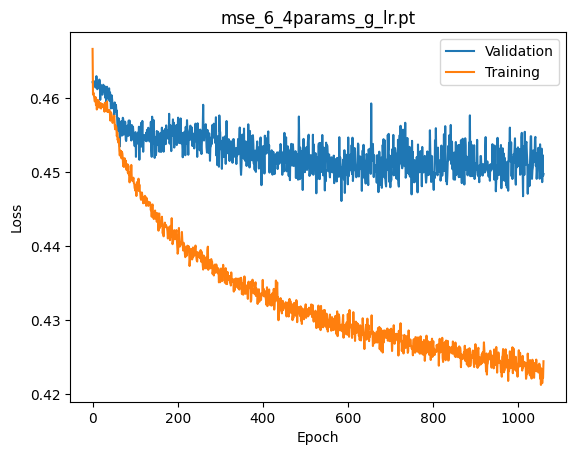

In [241]:

import matplotlib.pyplot as plt
import numpy as np
checkpoint = torch.load("mse_6_4params_g_lr.pt")
val_losses = checkpoint['val_losses_so_far']
train_losses = checkpoint['train_losses_so_far']
epochs = checkpoint['epoch']
print(epochs)

plt.plot(np.arange(epochs+ 1), val_losses)
plt.plot(np.arange(epochs+ 1), train_losses)
plt.legend(["Validation", "Training"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("mse_6_4params_g_lr.pt")
plt.show()


1990


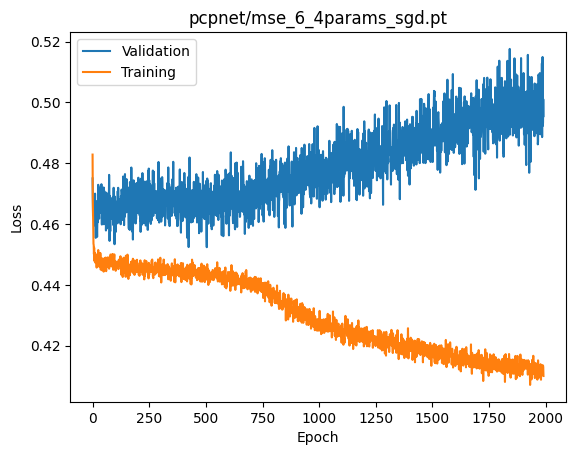

In [4]:
import matplotlib.pyplot as plt
import numpy as np
checkpoint = torch.load("mse_6_4params_sgd.pt")
val_losses = checkpoint['val_losses_so_far']
train_losses = checkpoint['train_losses_so_far']
epochs = checkpoint['epoch']
print(epochs)

plt.plot(np.arange(epochs+ 1), val_losses)
plt.plot(np.arange(epochs+ 1), train_losses)
plt.legend(["Validation", "Training"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("pcpnet/mse_6_4params_sgd.pt")
plt.show()


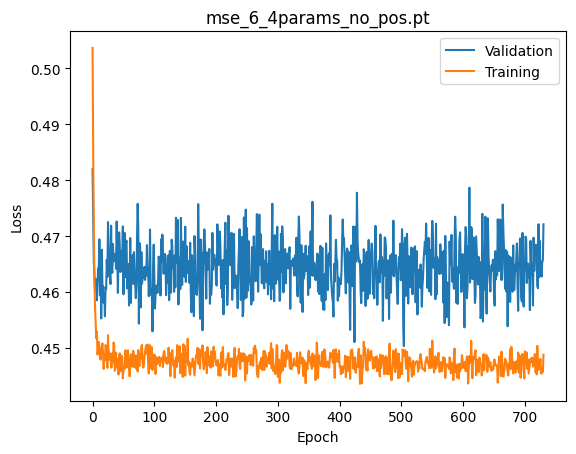

In [8]:
checkpoint = torch.load("mse_6_4params_no_pos.pt")
val_losses = checkpoint['val_losses_so_far']
train_losses = checkpoint['train_losses_so_far']
epochs = checkpoint['epoch']
# print(epochs)

plt.plot(np.arange(epochs+ 1), val_losses)
plt.plot(np.arange(epochs+ 1), train_losses)
plt.legend(["Validation", "Training"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("mse_6_4params_no_pos.pt")
plt.show()

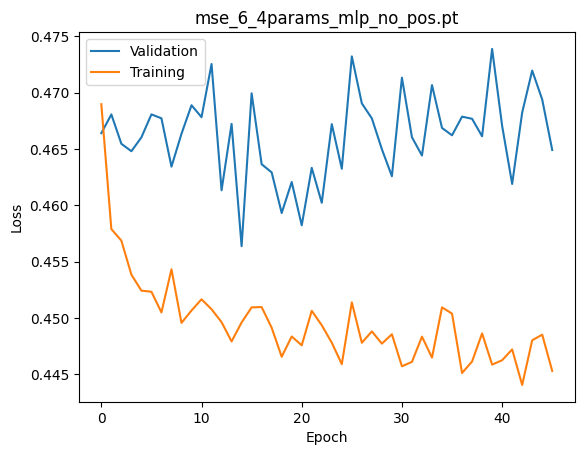

In [6]:
checkpoint = torch.load("mse_6_4params_mlp_no_pos.pt")
val_losses = checkpoint['val_losses_so_far']
train_losses = checkpoint['train_losses_so_far']
epochs = checkpoint['epoch']
# print(epochs)

plt.plot(np.arange(epochs+ 1), val_losses)
plt.plot(np.arange(epochs+ 1), train_losses)
plt.legend(["Validation", "Training"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("mse_6_4params_mlp_no_pos.pt")
plt.show()

In [155]:
# n_gt = np.random.randn(4,3).ravel()
# n_pca = np.random.randn(4,3).ravel()
print('n_gt: ', n_gt)
print('n_pca: ', n_pca)

n_gt:  [[-1.00125167  1.67896977  0.49886653]
 [ 0.1261209  -0.01017674 -0.33989958]
 [-1.37285031 -0.5699523   1.02229989]
 [-0.98417055  0.04650522  1.85152848]]
n_pca:  tensor([[ 0.3589,  1.3398,  0.1848],
        [-0.2624, -1.7638, -0.1967],
        [ 1.4860, -0.1616,  0.0444],
        [ 1.3873,  0.6030, -1.6033]], dtype=torch.float64)


In [165]:
n_gt= torch.tensor(n_gt.reshape(4,3))
n_pca = torch.tensor(n_pca.reshape(4,3))
n_gt = nn.functional.normalize(n_gt, dim=1)
n_pca = nn.functional.normalize(n_pca, dim=1)

/tmp/ipykernel_1553541/1788901535.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  n_gt= torch.tensor(n_gt.reshape(4,3))
/tmp/ipykernel_1553541/1788901535.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  n_pca = torch.tensor(n_pca.reshape(4,3))


In [201]:
import torch
import torch.nn.functional as F
import pytorch3d.ops
import numpy as np
import pdb
def align_vectors(a, b):
    b = b / torch.norm(b) # normalize a
    a = a / torch.norm(a) # normalize b
    v = torch.cross(a, b)
    c = torch.dot(a, b)
    
    return v, c

def get_angle(a, b):
    """Angle between vectors"""
    print(a.shape, b.shape)
    a = a / torch.linalg.norm(a, dim = 1).unsqueeze(1)  
    b = b / torch.linalg.norm(b, dim= 1).unsqueeze(1)
    print(a.shape, b.shape)
    dot = torch.sum(a * b, dim=1).clamp(-1, 1)
    print("dot shape: ",dot.shape)
    return torch.acos(dot)

# Example values for sin(theta) and cos(theta)

# r,v,c = align_vectors(n_pca, n_gt)
params =[]
for i in range(4):
    v, c = align_vectors(n_pca[i], n_gt[i])
    params.append(torch.cat((torch.tensor(v), torch.tensor([c]))))
#convert params to tensor
params = torch.stack(params)
esti_params = params
# print(params, esti_params)

sin = esti_params[:,:3]
# print(sin.shape)
cos = esti_params[:, 3]
# theta = torch.atan2(sin.norm(dim=1), cos)
# print("theta",theta)
# # print(params.shape)
# sin_theta_norm = sin.norm(dim=1).unsqueeze(1)
# axis =torch.where(sin_theta_norm > 0, sin / sin_theta_norm, torch.tensor([[1.0, 0.0, 0.0]])) #checked
# print(axis.shape)
# axis_angle = axis * theta.unsqueeze(1) #checked

# rot_mat = pytorch3d.transforms.axis_angle_to_matrix(axis_angle)
# # n_pca = torch.tensor(n_pca.reshape(4,3,1))
# rot_norms = torch.matmul(rot_mat, n_pca.unsqueeze(2)).squeeze(2)
# angle_diff = get_angle(n_gt, rot_norms)

theta = torch.acos(cos)
print("theta",theta)
# print(params.shape)
sin_theta_norm = torch.sin(theta).reshape(-1,1)
axis =torch.where(sin_theta_norm > 0, sin / (sin.norm(dim=1).unsqueeze(1)), torch.tensor([[1.0, 0.0, 0.0]])) #checked
print(axis.shape)
axis_angle = axis * theta.unsqueeze(1) #checked

rot_mat = pytorch3d.transforms.axis_angle_to_matrix(axis_angle)
# n_pca = torch.tensor(n_pca.reshape(4,3,1))
# rot_norms = torch.matmul(rot_mat, init.unsqueeze(2)).squeeze(2)
rot_norms = torch.matmul(rot_mat, n_pca.unsqueeze(2)).squeeze(2)
angle_diff = get_angle(n_gt, rot_norms)
# sin_theta = torch.tensor(v) 
# cos_theta = torch.tensor(c)  
# theta = torch.atan2(sin_theta.norm(), cos_theta) 

# if sin_theta.norm() > 0:
#     axis = sin_theta / sin_theta.norm()
# else:
#     axis = torch.tensor([1, 0, 0]) 

# axis_angle = axis * theta

# print("Axis:", axis)
# print("Angle (radians):", theta)
# print("Axis-Angle Representation:", axis_angle)
# print("magnitude of axis: ", axis_angle.norm())


theta tensor([0.7923, 1.4913, 2.3535, 2.7690], dtype=torch.float64)
torch.Size([4, 3])
torch.Size([4, 3]) torch.Size([4, 3])
torch.Size([4, 3]) torch.Size([4, 3])
dot shape:  torch.Size([4])


/tmp/ipykernel_1553541/177405832.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params.append(torch.cat((torch.tensor(v), torch.tensor([c]))))


In [202]:
angle_diff

tensor([0., 0., 0., 0.], dtype=torch.float64)

In [185]:
esti_params[:, :3].norm(dim=1).shape

torch.Size([4])

In [187]:
sin.norm(dim=1).unsqueeze(1).shape

torch.Size([4, 1])

In [192]:
esti_params[:,:3]

tensor([[ 0.1268, -0.1290,  0.6886],
        [ 0.9183, -0.1752,  0.3460],
        [-0.0519, -0.5857, -0.3962],
        [ 0.2576, -0.2143,  0.1423]], dtype=torch.float64)

In [99]:
n_gt

array([-1.00125167,  1.67896977,  0.49886653,  0.1261209 , -0.01017674,
       -0.33989958, -1.37285031, -0.5699523 ,  1.02229989, -0.98417055,
        0.04650522,  1.85152848])

In [102]:
torch.matmul(rot_mat[0], n_pca[0].reshape(3,))

tensor([-0.6945,  1.1645,  0.3460], dtype=torch.float64)

In [98]:
rot_norms.reshape(4,3)

tensor([[-0.6945,  1.1645,  0.3460],
        [ 0.6239, -0.0503, -1.6813],
        [-1.1379, -0.4724,  0.8474],
        [-1.0343,  0.0489,  1.9459]], dtype=torch.float64)

In [24]:
import pytorch3d
# axis_angle = torch.tensor(axis_angle)
pyt_r = pytorch3d.transforms.axis_angle_to_matrix(axis_angle)

In [25]:
pyt_r == torch.tensor(r)

tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])

In [26]:
pyt_r

tensor([[-0.7604, -0.5706, -0.3102],
        [ 0.6159, -0.4818, -0.6233],
        [ 0.2062, -0.6650,  0.7178]], dtype=torch.float64)

In [27]:
r

array([[-0.76038132, -0.57061615, -0.31018939],
       [ 0.61586311, -0.48182224, -0.62334578],
       [ 0.20623502, -0.66501469,  0.71779007]])

In [30]:
esti_n = torch.matmul(torch.tensor(r), torch.tensor(n_pca))
esti_n

tensor([ 0.3229, -0.4929, -0.2032], dtype=torch.float64)

In [31]:
esti_n_py3d = torch.matmul(pyt_r, torch.tensor(n_pca))
esti_n_py3d

tensor([ 0.3229, -0.4929, -0.2032], dtype=torch.float64)

In [204]:
import torch
import torch.nn.functional as F
import numpy as np
import pdb
def align_vectors(a, b):
    b = b / np.linalg.norm(b) # normalize a
    a = a / np.linalg.norm(a) # normalize b
    v = np.cross(a, b)
    c = np.dot(a, b)
    v1, v2, v3 = v
    h = 1 / max((1 + c), 1e-8)
    Vmat = np.array([[0, -v3, v2],
                  [v3, 0, -v1],
                  [-v2, v1, 0]])
    R = np.eye(3, dtype=np.float64) + Vmat + (Vmat.dot(Vmat) * h)
    if c == -1:
       R = -np.eye(3, dtype=np.float64) + Vmat + (Vmat.dot(Vmat) * h)


    return R, v, c

def get_angle(a, b):
    """Angle between vectors"""
    a = a / np.linalg.norm(a)
    b = b / np.linalg.norm(b)
    return np.arccos(a.dot(b))

# Example values for sin(theta) and cos(theta)
n_gt_ck = n_gt.reshape(4,3)[0].ravel()
n_pca_ck = n_pca.reshape(4,3)[0].ravel()
# n_gt_ck = torch.tensor([ 0.8728,  0.1755, -0.4554])
# n_pca_ck = torch.tensor([ 0.7811,  0.1294, -0.6108])
print('n_gt: ', n_gt_ck)
print('n_pca: ', n_pca_ck)
r,v,c = align_vectors(n_pca_ck, n_gt_ck)
sin_theta = torch.tensor(v) 
cos_theta = torch.tensor(c)  
theta = torch.atan2(sin_theta.norm(), cos_theta) 

if sin_theta.norm() > 0:
    axis = sin_theta / sin_theta.norm()
else:
    axis = torch.tensor([1, 0, 0]) 

axis_angle = axis * theta

print("Axis:", axis)
print("Angle (radians):", theta)
print("Axis-Angle Representation:", axis_angle)
print("magnitude of axis: ", axis.norm())


n_gt:  tensor([-0.4963,  0.8322,  0.2473], dtype=torch.float64)
n_pca:  tensor([0.2565, 0.9575, 0.1321], dtype=torch.float64)
Axis: tensor([ 0.1781, -0.1812,  0.9672], dtype=torch.float64)
Angle (radians): tensor(0.7923, dtype=torch.float64)
Axis-Angle Representation: tensor([ 0.1411, -0.1435,  0.7663], dtype=torch.float64)
magnitude of axis:  tensor(1., dtype=torch.float64)


In [109]:
pyt_r = pytorch3d.transforms.axis_angle_to_matrix(axis_angle)
pyt_r

tensor([[ 0.7116, -0.6983, -0.0777],
        [ 0.6790,  0.7120, -0.1790],
        [ 0.1803,  0.0746,  0.9808]], dtype=torch.float64)

In [110]:
r

array([[ 0.71162728, -0.69825039, -0.07767238],
       [ 0.67903023,  0.71195131, -0.17900638],
       [ 0.18029022,  0.07464393,  0.9807771 ]])

In [118]:
pred = torch.matmul(pyt_r, torch.tensor(n_pca_ck))

/tmp/ipykernel_1553541/1297171549.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = torch.matmul(pyt_r, torch.tensor(n_pca_ck))


In [120]:
pred

tensor([-0.6945,  1.1645,  0.3460], dtype=torch.float64)

In [112]:
torch.matmul(torch.tensor(r), torch.tensor(n_pca_ck))

/tmp/ipykernel_1553541/1986960358.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.matmul(torch.tensor(r), torch.tensor(n_pca_ck))


tensor([-0.6945,  1.1645,  0.3460], dtype=torch.float64)

In [116]:
chk = n_gt[:3]
chk = chk/np.linalg.norm(chk)

In [117]:
chk

array([-0.49628299,  0.8322025 ,  0.24726947])

In [122]:
print('Angle:', (get_angle(n_gt.reshape(4,3)[0], pred))*180/np.pi)

Angle: 8.537736462515939e-07


In [229]:
import numpy as np
import pdb
def align_vectors(a, b):
    b = b / np.linalg.norm(b) # normalize a
    a = a / np.linalg.norm(a) # normalize b
    v = np.cross(a, b)
    print("v: ", v)
    # s = np.linalg.norm(v)
    # v = v/max(s,1e-8)
    c = np.dot(a, b)

    # v = np.sin(np.arccos(c))*v
    v1, v2, v3 = v
    h = 1 / max((1 + c), 1e-8)
    Vmat = np.array([[0, -v3, v2],
                  [v3, 0, -v1],
                  [-v2, v1, 0]])
    R = np.eye(3, dtype=np.float64) + Vmat + (Vmat.dot(Vmat) * h)
    if c == -1:
       R = -np.eye(3, dtype=np.float64) + Vmat + (Vmat.dot(Vmat) * h)


    return R, v, c

def get_angle(a, b):
    """Angle between vectors"""
    # print(a.shape, b.shape)
    a = a / torch.linalg.norm(a, dim = -1)
    b = b / torch.linalg.norm(b, dim= -1)
    # print(a.shape, b.shape)
    dot = torch.dot(a,b)
    # print("dot shape: ",dot.shape)
    return torch.acos(dot)

# direction = n_gt.reshape(4,3)[0]
# point = n_pca.reshape(4,3)[0]

direction = torch.tensor([ 0.8728,  0.1755, -0.4554])
point = torch.tensor([ 0.7811,  0.1294, -0.6108])
direction = nn.functional.normalize(torch.tensor(direction), dim=0)
point = nn.functional.normalize(torch.tensor(point), dim=0)
print("dir: ", direction.norm(), "point: ", point.norm())
# direction = np.random.randn(4,3)[0]
# point = np.random.randn(4,3)[0]
rotation, axis, dot_prod = align_vectors(point, direction)
# Rotate point in align with direction. The result vector is aligned with direction
result = torch.from_numpy(rotation.dot(point)).float()
print(result)
print('Axis: ', axis)
print('Angle:', (get_angle(direction, result))*180/np.pi) 

dir:  tensor(1.0000) point:  tensor(1.0000)
v:  [ 0.04826889 -0.17740157  0.02414385]
tensor([ 0.8728,  0.1755, -0.4554])
Axis:  [ 0.04826889 -0.17740157  0.02414385]
Angle: tensor(0.)


/tmp/ipykernel_1553541/325951034.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  direction = nn.functional.normalize(torch.tensor(direction), dim=0)
/tmp/ipykernel_1553541/325951034.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  point = nn.functional.normalize(torch.tensor(point), dim=0)


In [232]:
axis/ np.linalg.norm(axis)

array([ 0.26030844, -0.95670587,  0.13020496], dtype=float32)

In [233]:
dot_prod

0.9826577

In [231]:
axis

array([ 0.04826889, -0.17740157,  0.02414385], dtype=float32)

In [235]:
rotation

array([[ 0.98383269, -0.02846279, -0.17681378],
       [ 0.01982491,  0.99853086, -0.0504292 ],
       [ 0.17798937,  0.04610858,  0.98295157]])

In [236]:
result

tensor([ 0.8728,  0.1755, -0.4554])

In [240]:
def get_angle_eval_vala(a, b):
    """Angle between vectors"""
    # print(a.shape, b.shape)
    a = a / torch.linalg.norm(a, dim = -1)
    b = b / torch.linalg.norm(b, dim= -1)
    # print(a.shape, b.shape)
    dot = torch.sum(a * b, dim=-1).clamp(-1, 1)
    # print("dot shape: ",dot.shape)
    return torch.acos(dot)

print(get_angle_eval_vala(direction, result))

tensor(0.)


In [130]:
direction = n_gt.reshape(4,3)[0]
point = n_pca.reshape(4,3)[0]

In [135]:
print(direction, point)

[-0.38523259 -0.35565874  0.14337403] [0.09720316 0.72454878 1.43847296]


In [199]:
import pytorch3d as py3d
import torch
x = py3d.transforms.axis_angle_to_matrix(torch.tensor([12.0, 1.0, 0.0]))
print(x.shape)

torch.Size([3, 3])


In [200]:
import sys
print(sys.executable)


/home/cvig_5/anaconda3/envs/pytorch3d/bin/python


In [4]:
import numpy as np
inds = np.load("pclouds/Cup33100k.250inds.npy")
dists = np.load("pclouds/Cup33100k.250dists.npy")

In [5]:
inds.shape

(100000, 250)

In [6]:
err_ind = np.where(inds==8589941309)
err_ind

(array([39053]), array([198]))

In [15]:
inds[39053]

array([     39053,      42394,      64460,      53377,      38171,
            46947,      91553,      83329,      81638,      87149,
             2357,      52396,      11535,       9526,       2825,
             9651,      39339,      24895,      59210,      42896,
            19629,      14265,      78214,      21808,        875,
            53196,      82342,      72376,       8687,      11031,
            28430,      87941,       2675,      72896,      93455,
            70870,      66692,      80187,      58101,      60638,
            94134,      10614,      60327,      66309,      56111,
            35047,       7611,      60341,      28996,       6497,
            23183,      61481,      41854,      12746,      90770,
            71173,      83693,      41525,      14241,      55029,
            46825,       7610,      76757,      11540,      95192,
             7830,      66558,       8480,      67016,      97394,
            30167,      12625,      50011,      17777,      91

In [7]:
dists[err_ind]

array([0.08056134])

In [10]:
pcd = np.loadtxt("pclouds/Cup33100k.xyz")
pcd.shape

(100000, 3)

In [11]:
pcd[39053]

array([ 0.412683,  0.319008, -0.417061])

In [18]:
np.where(np.isnan(pcd)==True)

(array([], dtype=int64), array([], dtype=int64))